# **Leetcode Capriccio**

**Time complexity:**
- how the running time of an algorithm grows as the input size n grows
- It counts the number of “basic operations” (comparisons, assignments, loop iterations) in the worst case (often), ignoring constant factors

**Space complexity:**
- how the extra memory used by an algorithm grows as input size n grows
- “space” usually means extra space beyond the input (auxiliary space)

### **Array**

121. Best Time to Buy and Sell Stock (easy)

You are given an array prices where prices[i] is the price of a given stock on the ith day. You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

- Time complexity: o(n)
- Space complexity: o(1)

In [40]:
def maxProfit(prices):
    min_price = float("inf")
    max_profit = 0

    for price in prices:
        if price < min_price:
            min_price = price
        else:
            max_profit = max(max_profit, price - min_price)

    return max_profit

In [44]:
prices = [7,1,5,3,6,4]
maxProfit(prices)

5

In [42]:
def maxProfit(prices):
    l = 0
    r = 1
    max_profit = 0

    while r < len(prices):
        if prices[r] > prices[l]:
            profit = prices[r] - prices[l]
            max_profit = max(max_profit, profit)
            r += 1
        else:
            l = r
            r += 1
    return max_profit

In [43]:
prices = [7,1,5,3,6,4]
maxProfit(prices)

5

268. Missing Number (easy)

Given an array nums containing n distinct numbers in the range [0, n], return the only number in the range that is missing from the array.
- Time complexity: o(n)
- Space complexity: o(1)

In [21]:
class Solution:
    def missingNumber_slow(self, nums):
        for i in range(len(nums)+1): # slow: o(n^2)
            if i not in nums:
                return i

    def missingNumber_bit(self, nums):
        bit = 0
        for idx, num in enumerate(nums):
            bit ^= num
            bit ^= (idx + 1)
        return bit

    def missingNumber(self, nums):
        res = len(nums)
        for i, num in enumerate(nums):
            res += i - num
        return res

In [24]:
nums = [3,0,1]
sol = Solution()
sol.missingNumber(nums)

2

5. Longest Palindromic Substring (medium)

Given a string s, return the longest palindromic substring in s.
- Time complexity: o(n^2)
- Space complexity: o(n)

In [1]:
def longestPalindrome(s):
    result = ""
    result_len = 0

    for i in range(len(s)):
        # odd length
        l, r = i, i
        while l >= 0 and r < len(s) and s[l] == s[r]:
            if result_len <  r - l + 1:
                result = s[l:r+1]
                result_len = r - l + 1
            l -= 1
            r += 1

        # even length
        l, r = i, i+1
        while l >= 0 and r < len(s) and s[l] == s[r]:
            if result_len <  r - l + 1:
                result = s[l:r+1]
                result_len = r - l + 1
            l -= 1
            r += 1

    return result

In [3]:
s = "babad"
longestPalindrome(s)

'bab'

27. Remove Element (easy)

Given an integer array nums and an integer val, remove all occurrences of val in nums in-place. The order of the elements may be changed. Then return the number of elements in nums which are not equal to val.

- Time complexity: o(n)
- Space complexity: o(1)

In [ ]:
def removeElement(nums, val):
    index = 0
    for item in nums:
        if item != val:
            nums[index] = item
            index += 1
    return index

In [9]:
# slow and fast pointers: similar to above
def removeElement_sf(nums, val):
    slow = 0 # index of the new list
    fast = 0 # find the elements left and save to the new list
    while fast < len(nums):
        if nums[fast] != val:
            nums[slow] = nums[fast]
            slow += 1
        fast += 1
    return slow

In [ ]:
# two pointers
def removeElement_tp(nums, val):
    left, right = 0, len(nums) - 1
    while left <= right:
        while left <= right and nums[left] != val:
            left += 1 # find the index where we should store the new list
        while left <= right and nums[right] == val:
            right -= 1 # find the index where we want to save to the new list
        if left < right: # no need to have "=" as no need to assign the value is left = right
            nums[left] = nums[right]
            left += 1
            right -= 1
    return left # count = index + 1


Note:
erase function: o(n)

59. Spiral Matrix II (medium)

Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.

- Time complexity: o(n)
- Space complexity: o(n)

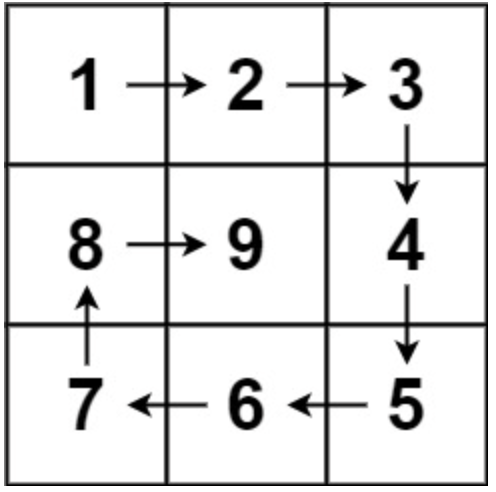

In [8]:
def generateMatrix(n):
    nums = [[0]*n for _ in range(n)]
    startx, starty = 0, 0 # starting point
    loop, mid = n//2, n//2 # count of loops: n//2
    count = 1 # numbers to be inserted

    for offset in range(1, loop + 1): # offsite also +1 after loop +1
        for j in range(starty, n - offset): # from left to right [left, right)
            nums[startx][j] = count
            count += 1
        for i in range(startx, n - offset): # from top to bottom [top, bottom)
            nums[i][j+1] = count # j+1 is fixed value
            count += 1
        for j in range(n - offset, starty, -1): # from right to left [right, left)
            nums[i+1][j] = count # i+1 is fixed value
            count += 1
        for i in range(n-offset, startx, -1): # from bottom to top [bottom, top)
            nums[i][starty] = count
            count += 1
        startx += 1 # updating starting point
        starty += 1

    if n % 2 != 0: # if n is odd, then add the last count to the center
        nums[mid][mid] = count
    return nums

In [9]:
n = 3
generateMatrix(n)

[[1, 2, 3], [8, 9, 4], [7, 6, 5]]

In [6]:
n = 4
nums = [[0] * n for _ in range(n)]
nums

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

### **Binary search**
- Array needs to be sorted
- Can be used to find the first and last item that satisfy certain condition

704. Binary Search (easy)

Given an array of integers nums which is sorted in ascending order, and an integer target, write a function to search target in nums. If target exists, then return its index. Otherwise, return -1.
- Time complexity: o(logn)
- Space complexity: o(1)

In [13]:
# method 1
def search(nums, target):
    low = 0
    high = len(nums) - 1 # define target in [left, right]
    while low <= high: # include case of single number
        mid = low + (high - low) // 2
        if nums[mid] < target:
            low = mid + 1
        elif nums[mid] > target:
            high = mid - 1
        else:
            return mid
    return -1

In [ ]:
# method 1 - handles repeating elements
def search(nums, target):
    low = 0
    high = len(nums) - 1
    while low <= high:
        mid = low + (high - low) // 2
        if target <= nums[mid]:
            high = mid - 1
        else:
            low = mid + 1
    if low == len(nums) or nums[low] != target:
        return -1
    return low

In [14]:
nums = [-1,0,3,5,9,12]
target = 9
search(nums, target)

4

In [17]:
# method 2
def search(nums, target):
    low = 0
    high = len(nums) # define target in [left, right)
    while low < high: # include case of single number
        mid = low + (high - low) // 2
        if nums[mid] < target:
            low = mid + 1
        elif nums[mid] > target:
            high = mid
        else:
            return mid
    return -1

In [18]:
nums = [-1,0,3,5,9,12]
target = 9
search(nums, target)

4

34. Find First and Last Position of Element in Sorted Array (medium)

Given an array of integers nums sorted in non-decreasing order, find the starting and ending position of a given target value. If target is not found in the array, return [-1, -1].

- Time complexity: o(logn)
- Space complexity: o(1)

In [4]:
def searchRange(nums, target):
    # look for the starting position of the target value
    low = 0
    high = len(nums) - 1
    while low <= high:
        mid = low + (high - low) // 2
        if target <= nums[mid]:
            high = mid - 1 # high points to the 1 element to the left of the low
        else:
            low = mid + 1 # low is the first index satisfy with nums[index] >= target
    start = low # want the starting point of the target value

    # if starting position of the target is:
    # 1. bigger than all elements or 2. not in the original list at all
    # no need to proceed to find the last position
    if start == len(nums) or nums[start] != target:
        return [-1, -1]

    # look for the ending position of the target value
    high = len(nums) - 1
    while low <= high:
        mid = low + (high - low) // 2
        if target < nums[mid]:
            high = mid - 1 # high points to the 1 element to the left of the low
        else:
            low = mid + 1 # low is the first index satisfy with nums[index] > target
    end = high # (or low - 1) want the ending point of the target value

    return [start, end]

In [5]:
nums = [5,7,7,8,8,10]
target = 8
searchRange(nums, target)

[3, 4]

35. Search Insert Position (easy)

Given a sorted array of distinct integers and a target value, return the index if the target is found. If not, return the index where it would be if it were inserted in order.
- Time complexity: o(logn)
- Space complexity: o(1)

In [9]:
def searchInsert(nums):
    left = 0
    right = len(nums) - 1
    while left <= right:
        mid = left + (right - left) // 2
        if nums[mid] == target:
            return mid
        elif target < nums[mid]:
            right = mid - 1
        else:
            left = mid + 1
    return left

In [10]:
nums = [1,3,5,6]
target = 2
searchInsert(nums)

1

69. sqrt(x) (easy)

Given a non-negative integer x, return the square root of x rounded down to the nearest integer. The returned integer should be non-negative as well
- Time complexity: o(logn)
- Space complexity: o(1)

In [6]:
def mySqrt(x):
    low = 1
    high = x

    # find the last element that satisfy the condition
    while low <= high:
        mid = low + (high - low) // 2
        if x == mid * mid:
            return mid
        elif x < mid * mid:
            high = mid - 1
        else:
            low = mid + 1
    return high

In [7]:
mySqrt(8)

2

In [8]:
mySqrt(9)

3

33. Search in Rotated Sorted Array (medium)

Prior to being passed to your function, nums is possibly left rotated at an unknown index k (1 <= k < nums.length) such that the resulting array is [nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]] (0-indexed). For example, [0,1,2,4,5,6,7] might be left rotated by 3 indices and become [4,5,6,7,0,1,2].

Given the array nums after the possible rotation and an integer target, return the index of target if it is in nums, or -1 if it is not in nums.

- Time complexity: o(logn)
- Space complexity: o(1)

In [7]:
def search(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = l + (r - l) // 2
        if nums[mid] == target:
            return mid
        elif nums[mid] >= nums[l]:
            if nums[l] <= target < nums[mid]:
                r = mid - 1
            else:
                l = mid + 1
        else:
            if nums[mid] < target <= nums[r]:
                l = mid + 1
            else:
                r = mid - 1
    return -1

In [8]:
nums = [4,5,6,7,0,1,2]
target = 7
search(nums, target)

3

In [2]:
def search(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = l + (r -l) // 2
        if nums[mid] == target:
            return mid
        elif nums[mid] <= nums[r] <= nums[l]:
            if nums[mid] < target <= nums[r]:
                l = mid + 1
            else:
                r = mid - 1
        elif nums[l] <= nums[mid] <= nums[r]:
            if nums[l] <= target < nums[mid]:
                r = mid - 1
            else:
                l = mid + 1
        elif nums[r] <= nums[l] <= nums[mid]:
            if nums[l] <= target < nums[mid]:
                r = mid - 1
            else:
                l = mid + 1
    return - 1

In [1]:
# simplify to below
def search(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = l + (r -l) // 2
        if nums[mid] == target:
            return mid
        elif nums[mid] <= nums[r] <= nums[l]:
            if nums[mid] < target <= nums[r]:
                l = mid + 1
            else:
                r = mid - 1
        else:
            if nums[l] <= target < nums[mid]:
                r = mid - 1
            else:
                l = mid + 1

    return - 1

153. Find minimum in rotated sorted array (medium)

Given the sorted rotated array nums of unique elements, return the minimum element of this array.

- Time complexity: o(logn)
- Space complexity: o(1)

In [3]:
def findMin(nums):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = l + (r -l) // 2
        if nums[l] <= nums[mid] <= nums[r]:
            return nums[l]
        elif nums[r] <= nums[l] <= nums[mid]:
            l = mid + 1
        else: # nums[mid] <= nums[r] <= nums[l]
            r = mid
    return -1

In [5]:
nums = [4,5,6,7,0,1,2]
findMin(nums)

0

875. Koko Eating Bananas (medium)

Koko loves to eat bananas. There are n piles of bananas, the ith pile has piles[i] bananas. The guards have gone and will come back in h hours.

Koko can decide her bananas-per-hour eating speed of k. Each hour, she chooses some pile of bananas and eats k bananas from that pile. If the pile has less than k bananas, she eats all of them instead and will not eat any more bananas during this hour.

Koko likes to eat slowly but still wants to finish eating all the bananas before the guards return.

Return the minimum integer k such that she can eat all the bananas within h hours.

1011. Capacity To Ship Packages Within D Days (medium)
410. Split Array Largest Sum (hard)
1482. Minimum Number of Days to Make m Bouquets (medium)
1552. Magnetic Force Between Two Balls (medium)
774. Minimize Max Distance to Gas Station (hard-ish; floating / precision)
162. Find Peak Element (medium) — also feels like answer-search

### **Sliding windows**

3. Longest Substring Without Repeating Characters (medium)

Given a string s, find the length of the longest substring without duplicate characters.
- Time complexity: o(n)
- Space complexity: o(n) - set

In [3]:
def lengthOfLongestSubstring(s):
    p0 = 0
    max_len = 0
    dict_map = set()

    for i, val in enumerate(s):
        while val in dict_map:
            dict_map.remove(s[p0])
            p0 += 1
        dict_map.add(val)
        max_len = max(max_len, i - p0 + 1)

    return max_len

In [4]:
s = "abcabcbb"
lengthOfLongestSubstring(s)

3

209. Minimum Size Subarray Sum (medium)

Given an array of positive integers nums and a positive integer target, return the minimal length of a subarray whose sum is greater than or equal to target. If there is no such subarray, return 0 instead.
- Time complexity: o(n) - Each element enters the sliding window and is processed once, and leaves the window and is processed once. So every element is processed twice, meaning the time complexity is 2*n, which is o(n)
- Space complexity: o(1)

In [2]:
def minSubArrayLen(target, nums):
    p0 = 0
    cur_sum = 0
    min_len = float('inf')

    for i in range(len(nums)): # denote the ending point of the window
        cur_sum += nums[i]
        while cur_sum >= target:
            min_len = min(min_len, i - p0 + 1)
            cur_sum -= nums[p0]
            p0 += 1 # denote the starting point of the window

    if min_len == float('inf'):
        return 0

    return min_len # min_len if min_len != float('inf') else 0

In [3]:
nums = [2,3,1,2,4,3]
target = 7
minSubArrayLen(target, nums)

2

In [4]:
# two pointers
def minSubArrayLen_1(s, nums):
    left = 0
    right = 0
    min_len = float('inf')
    cur_sum = 0

    while right < len(nums):
        cur_sum += nums[right]

        while cur_sum >= s:
            min_len = min(min_len, right - left + 1)
            cur_sum -= nums[left]
            left += 1

        right += 1

    return min_len if min_len != float('inf') else 0

In [5]:
nums = [2,3,1,2,4,3]
target = 7
minSubArrayLen_1(target, nums)

2

904. Fruit Into Baskets (medium)

You only have two baskets, and each basket can only hold a single type of fruit. There is no limit on the amount of fruit each basket can hold.
Starting from any tree of your choice, you must pick exactly one fruit from every tree (including the start tree) while moving to the right. The picked fruits must fit in one of your baskets.
Once you reach a tree with fruit that cannot fit in your baskets, you must stop.
Given the integer array fruits, return the maximum number of fruits you can pick.

- Time complexity: o(n)
- Space complexity: o(n)

In [1]:
import collections

def totalFruit(fruits):
    p0 = 0
    fruit_count = collections.defaultdict(int)
    max_num = 0

    for i, val in enumerate(fruits):
        fruit_count[val] += 1
        while len(fruit_count) > 2:
            fruit_count[fruits[p0]] -= 1
            if fruit_count[fruits[p0]] == 0:
                del fruit_count[fruits[p0]]
            p0 += 1
        max_num = max(max_num, i - p0 + 1)

    return max_num

In [2]:
fruits = [3,3,3,1,2,1,1,2,3,3,4]
totalFruit(fruits)

5

### **Prefix Sum**
To calculate range sum

58. Range Sum (not leetcode)

For the cumulative sum from index 2 to index 5 in the vec array, we can just use p[5] - p[1], which is o(1)
- Precompute p once: o(n)
- Each query answered in o(1)
- Total for many queries: o(n + q)

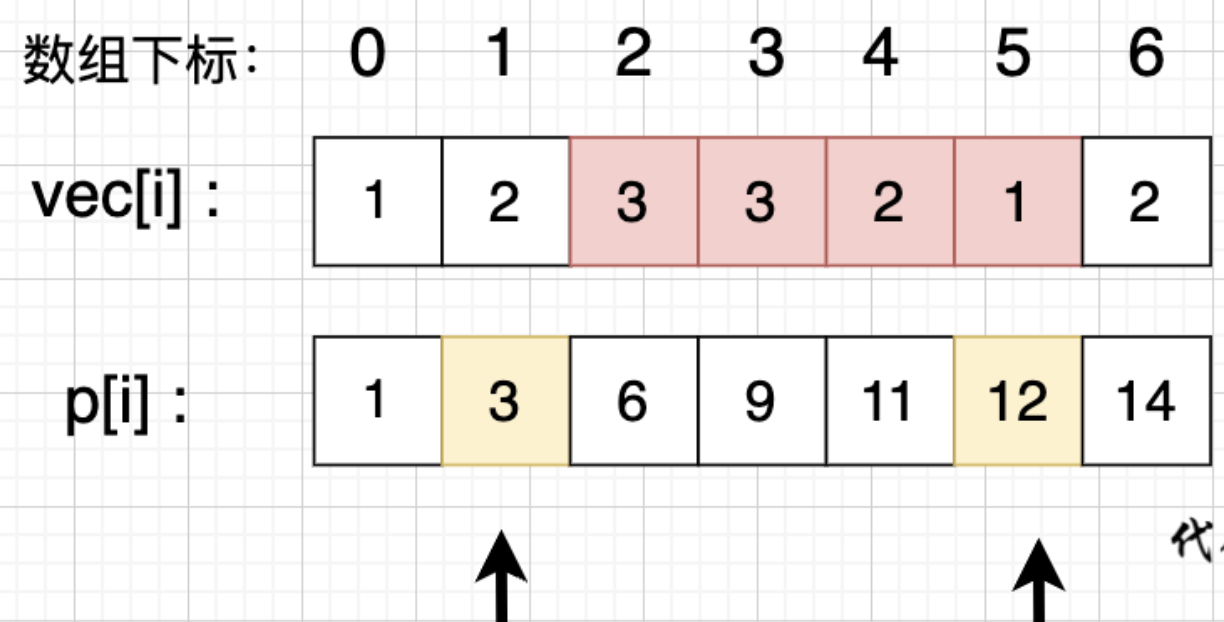

In [6]:
def sum_query(vec, a, b):
    # calculate prefix sum list
    prefix_sum = []
    pre_sum = 0
    for i in vec:
        pre_sum += i
        prefix_sum.append(pre_sum)

    # query for sum over index [a, b] of vec list
    sum = prefix_sum[b] - prefix_sum[a-1]

    return sum


In [7]:
vec = [1, 2, 3, 3, 2, 1, 2]
a = 2
b = 5
sum_query(vec, a, b)

9

### **Sorting**

252. Meeting Rooms (easy)

You are given an array of meeting time intervals, represented as intervals[i] = [starti, endi]. Each interval contains a start time and an end time for a meeting. Your task is to determine whether a person can attend all the meetings without any time conflicts.
- Time complexity: o(nlogn) - sorting
- Space complexity: o(1)

In [36]:
def can_attend_meetings(intervals):
    intervals.sort() # sort the intervals by start time: intervals.sort(key=lambda x: x[0])
    for i in range(len(intervals) - 1):
        if intervals[i+1][0] < intervals[i][1]: # check for any overlapping between consecutive meetings
            return False
    return True

In [37]:
intervals = [[0, 30], [5, 10], [15, 20]]
can_attend_meetings(intervals)

False

In [38]:
intervals = [[0, 3], [5, 10], [15, 20]]
can_attend_meetings(intervals)

True

Note: Sort by end time:
```intervals.sort(key=lambda x: x[1])```

### **Two pointers**

125. Valid Palindrome (easy)

A phrase is a palindrome if, after converting all uppercase letters into lowercase letters and removing all non-alphanumeric characters, it reads the same forward and backward. Given a string s, return true if it is a palindrome, or false otherwise.

- Time complexity: o(n)
- Space complexity: o(1)

In [47]:
def isPalindrome(s):
    l = 0
    r = len(s) - 1
    while l < r:
        while l < r and not s[l].isalnum():
            l += 1
        while l < r and not s[r].isalnum():
            r -= 1
        if s[l].lower() != s[r].lower():
            return False
        l += 1
        r -= 1
    return True

In [48]:
s = "A man, a plan, a canal: Panama"
isPalindrome(s)

True

Note:

1. .isalnum() returns True if that character is alphanumeric:
- a letter (a-z, A-Z, and many Unicode letters)
- or a digit (0-9)
2. .lower() converts string to lower case; .upper() converts string to upper case

11. Container with most water (medium)

You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]). Find two lines that together with the x-axis form a container, such that the container contains the most water. Return the maximum amount of water a container can store.
- Time complexity: o(n)
- Space complexity: o(1)

In [4]:
def maxArea(height):
    l, r = 0, len(height) - 1
    max_amount = 0

    while l < r:
        max_amount = max(max_amount, (r - l) * min(height[l], height[r]))
        if height[l] <= height[r]:
            l += 1
        else:
            r -= 1

    return max_amount

In [5]:
height = [1,8,6,2,5,4,8,3,7]
maxArea(height)

49

977. Squares of a Sorted Array (easy)

Given an integer array nums sorted in non-decreasing order, return an array of the squares of each number sorted in non-decreasing order.

- Time complexity: o(n)
- Space complexity: o(n) - result

In [11]:
def sortedSquares(nums):

    # if all values are positive:
    if nums[0] >= 0:
        return [i**2 for i in nums]
    # if all values are negative:
    if nums[-1] < 0:
        return [i**2 for i in nums[::-1]]

    # if mix of positive and negative values
    l, r = 0, len(nums) - 1
    i = len(nums) - 1 # index of the new list
    result = [0]*len(nums) # need to pre-allocate result to the right length, otherwise will index out of bound error
    while l <= r:
        if nums[l]**2 <= nums[r]**2:
            result[i] = nums[r]**2
            r -= 1
        else:
            result[i] = nums[l] ** 2
            l += 1
        i -= 1
    return result

In [12]:
nums = [-4,-1,0,3,10]
sortedSquares(nums)

[0, 1, 9, 16, 100]

15. 3Sum (medium)

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.
- Time complexity: o(n^2) - (More efficient than hash map)
- Space complexity: o(n) - result

In [5]:
def threeSum(nums):
    nums.sort()
    result = []

    for i in range(len(nums)):

        if nums[i] > 0: # for sorted array, if first element > 0, then no need to search further
            break
        if i > 0 and nums[i] == nums[i - 1]: # dedupe
            continue
        # why i > 0: [0,0,0]; why nums[i] == nums[i-1] instead of nums[i+1]: [-1, -1, 2]

        left = i + 1
        right = len(nums) - 1
        while left < right:
            sum = nums[left] + nums[i] + nums[right]
            if sum > 0:
                right -= 1
            elif sum < 0:
                left += 1
            else:
                result.append([nums[i], nums[left], nums[right]])
                # dedupe with while loop: not necessary — just moving the dedup logic earlier
                while left < right and nums[left] == nums[left + 1]: # why left < right first: avoid out of index for left + 1
                    left += 1
                left += 1 # while loop moves pointer to the last duplicates and need to move 1 further
                while left < right and nums[right] == nums[right - 1]:
                    right -= 1
                right -= 1

    return result

In [6]:
nums = [-1,0,1,2,-1,-4]
threeSum(nums)

[[-1, -1, 2], [-1, 0, 1]]

### **Hash table / map**

- Set; Map / Dictionary: search o(1)
- Check whether an element appeared
    - Just detect duplicates → set
    - Need counts/indices/details → dict

1. Two sum (easy)

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.
- Time complexity: o(n)
- Space complexity: o(n) - Dictionary

In [18]:
import collections
def twoSum_1(s, target):
    dict_map = collections.defaultdict(int)
    for i in range(len(s)):
        if s[i] in dict_map:
            return [i, dict_map[s[i]]]
        dict_map[target - s[i]] = i
    return []

In [20]:
nums = [6,8,5,4,7,5]
target = 9
twoSum_1(nums, target)

[3, 2]

In [24]:
# Method 1: use hash set
def twoSum_2(nums, target):
    records = dict()
    for index, value in enumerate(nums):
        if target - value in records:
            return [records[target- value], index]
        records[value] = index
    return []

In [25]:
nums = [6,8,5,4,7,5]
target = 9
twoSum_2(nums, target)

[2, 3]

In [34]:
# Method 2: use two pointers
def twoSum_3(nums, target):
    nums_sorted = sorted(nums)
    left = 0
    right = len(nums_sorted) - 1
    while left < right:
        current_sum = nums_sorted[left] + nums_sorted[right]
        if current_sum == target:
            return [nums.index(nums_sorted[left]), nums.index(nums_sorted[right])] # find the index in the original array
        elif current_sum > target:
            right -= 1
        else:
            left += 1
    return []

In [35]:
nums = [6,8,5,4,7,5]
target = 9
twoSum_3(nums, target)

[3, 2]

15. 3Sum (medium)

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

In [10]:
# Method 1 (bad code)
def threeSum(nums):
    def twoSum(s, target):
        dict_map = set()
        result = set()
        for i in range(len(s)):
            if s[i] in dict_map:
                result.add((s[i], target - s[i]))
            dict_map.add(target - s[i])
        return result

    nums.sort()
    output_map = set()
    for i in range(len(nums)):
        if i > 0 and nums[i] == nums[i-1]: # edge case [0,0,0]
            continue
        target_sum = 0 - nums[i]
        rest = nums[i+1:] # Never copy array: use index
        pairs = twoSum(rest, target_sum)
        for a, b in pairs:
            output_map.add((nums[i], a, b))

    return [list(t) for t in output_map] # turn tuple to list

# Time complexity: o(n^2)
# Space complexity: o(n)

In [11]:
nums = [-1,0,1,2,-1,-4]
threeSum(nums)

[[-1, 2, -1], [-1, 1, 0]]

Note:
In Python you can’t put a list directly into a set, because set elements must be hashable (immutable), and lists are mutable. you can put any hashable (immutable) object into a set.

242. Valid Anagram (easy)

Given two strings s and t, return true if t is an anagram of s, and false otherwise.
- Time complexity: o(n)
- Space complexity: o(n)

In [3]:
import collections

def isAnagram(s: str, t: str):
    dict = collections.defaultdict(int)
    for i in s:
        dict[i] += 1
    for m in t:
        if m not in dict:
            return False
        else:
            dict[m] -= 1
    return all(val == 0 for val in dict.values())

In [4]:
s = "anagram"
t = "nagaram"
isAnagram(s, t)

True

In [5]:
def isAnagram(s, t):
    from collections import defaultdict

    s_dict = defaultdict(int)
    t_dict = defaultdict(int)
    for x in s:
        s_dict[x] += 1

    for x in t:
        t_dict[x] += 1
    return s_dict == t_dict

In [6]:
s = "anagram"
t = "nagaram"
isAnagram(s, t)

True

349. Intersection of two arrays (easy)

Given two integer arrays nums1 and nums2, return an array of their intersection. Each element in the result must be unique and you may return the result in any order.

- Time complexity: o(n)
- Space complexity: o(n)

In [16]:
def intersection_1(nums1, nums2):
    set1 = set()
    set2 = set()
    for i in nums1:
        set1.add(i)
    for j in nums2:
        if j in set1:
            set2.add(j)
    return list(set2)

def intersection_2(nums1, nums2):
    return list(set(nums1) & set(nums2))

In [25]:
# Leetcode changes the array size to be lower than 1000,
# Using set directly not only uses more space than array, but is also slower.
# A set has to hash values to map them to keys which requires hash computations.
def intersection_3(nums1, nums2):
    count1 = [0]*1001
    count2 = [0]*1001
    result = []
    for i in range(len(nums1)):
        count1[nums1[i]]+=1
    for j in range(len(nums2)):
        count2[nums2[j]]+=1
    for k in range(1001):
        if count1[k]*count2[k]>0:
            result.append(k)
    return result

In [17]:
nums1 = [1,2,2,1]
nums2 = [2,2]
intersection_1(nums1, nums2)

[2]

In [26]:
intersection_3(nums1, nums2)

[2]

202. Happy Number (easy)

A happy number is a number defined by:

- Starting with any positive integer, replace the number by the sum of the squares of its digits.
- Repeat the process until the number equals 1 (where it will stay), or it loops endlessly in a cycle which does not include 1.
- Those numbers for which this process ends in 1 are happy.
- Return true if n is a happy number, and false if not.

Example:
- Input: n = 19; Output: true
- Explanation:
12 + 92 = 82
82 + 22 = 68
62 + 82 = 100
12 + 02 + 02 = 1

Time complexity: o(logn); Space complexity: o(1)

In [8]:
# We use a hash-based method to check whether the sum has appeared before.
# If it appears again, we return false;
# Otherwise we keep going until sum becomes 1.
def isHappy(n):
    record = set()
    while n != 1:
        n = sum(int(i) ** 2 for i in str(n))
        if n in record:
            return False
        record.add(n)
    return True

In [9]:
isHappy(19)

True

### **Stack and Queue**

20. Valid Parentheses (easy)

Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.
- Time complexity: o(n)
- Space complexity: o(n) - Stack

In [10]:
def isValid(str):
    dict = {'(': ')', '[': ']', '{': '}'}
    stack = []

    for i in str:
        if i in dict:
            stack.append(i)
        elif stack and dict[stack[-1]] == i:
            stack.pop()
        else:
            return False

    return not stack

In [14]:
str = "()[]{}"
isValid(str)

True

In [15]:
str = "([])"
isValid(str)

True

In [16]:
str = "([)]"
isValid(str)

False

### **Linked List**

21. Merge Two Sorted Lists (easy)

You are given the heads of two sorted linked lists list1 and list2. Merge the two lists into one sorted list.
- Time complexity: o(m+n) - each node visited once
- Space complexity: o(1) - Pointers

In [72]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def mergeTwoLists(self, list1, list2):
        dummy = ListNode()
        cur = dummy

        while list1 and list2:
            if list1.val <= list2.val:
                cur.next = list1
                list1 = list1.next
            else:
                cur.next = list2
                list2 = list2.next
            cur = cur.next

        if not list1:
            cur.next = list2
        if not list2:
            cur.next = list1

        return dummy.next

In [73]:
# Convert linked list to python list
def to_list(head):
    out = []
    while head:
        out.append(head.val)
        head = head.next
    return out

In [74]:
list1 = ListNode(1,ListNode(2,ListNode(4)))
list2 = ListNode(1,ListNode(3,ListNode(4)))
sol = Solution()
to_list(sol.mergeTwoLists(list1, list2))

[1, 1, 2, 3, 4, 4]

Note:
Without dummy, you’d need special handling for the very first node (setting the head).
With dummy:
- you always do cur.next = ...
- and the head is simply dummy.next

141. Linked List Cycle (easy)

Given head, the head of a linked list, determine if the linked list has a cycle in it.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, `pos` is used to denote the index of the node that tail's next pointer is connected to. Note that `pos` is not passed as a parameter.

- Time complexity: o(n) - visit all nodes
- Space complexity:
    - o(n) - hashset
    - o(1) - Floyd’s Tortoise and Hare is a classic trick to detect a cycle in a linked list using two pointers and no extra memory


In [64]:
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def hasCycle_1(self, head):
        hashset = set()
        cur = head
        while cur:
            hashset.add(cur)
            cur = cur.next
            if cur in hashset:
                return True
        return False

    def hasCycle_2(self, head):
        fast, slow = head, head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            if slow == fast:
                return True
        return False

In [65]:
# Create linked list:
# Create nodes
n0 = ListNode(3)
n1 = ListNode(2)
n2 = ListNode(0)
n3 = ListNode(-4)
# Link them: 3 -> 2 -> 0 -> -4
head = n0
n0.next = n1
n1.next = n2
n2.next = n3
# Create the cycle: -4 -> 2 (pos = 1)
n3.next = n1

In [4]:
def print_list(head, k=20):
    cur = head
    i = 0
    while cur and i < k:
        print(cur.val, end=" -> ")
        cur = cur.next
        i += 1
    print("...")  # stopped (end or limit)

In [59]:
print_list(head)

3 -> 2 -> 0 -> -4 -> 2 -> 0 -> -4 -> 2 -> 0 -> -4 -> 2 -> 0 -> -4 -> 2 -> 0 -> -4 -> 2 -> 0 -> -4 -> 2 -> ...


In [62]:
sol = Solution()
sol.hasCycle_1(head)

True

In [67]:
sol = Solution()
sol.hasCycle_2(head)

True

206. Reverse Linked List (easy)

Given the `head` of a singly linked list, reverse the list, and return the reversed list.
- Time complexity: o(n)
- Space complexity:
    - o(n): recursion - call stack
    - o(1): iteration - only pointers

In [14]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    # recursion
    def reverseList(self, head):
        if not head or not head.next:
            return head
        newhead = self.reverseList(head.next)
        head.next.next = head
        head.next = None
        return newhead

    # iteration
    def reverseList_rec(self, head):
        prev = None
        cur = head
        while cur:
            tmp = cur.next
            cur.next = prev
            prev = cur
            cur = tmp
        return prev

In [15]:
head = ListNode(1, ListNode(2, ListNode(3, ListNode(4, ListNode(5)))))
sol = Solution()
print_list(sol.reverseList(head))

5 -> 4 -> 3 -> 2 -> 1 -> ...


In [16]:
head = ListNode(1, ListNode(2, ListNode(3, ListNode(4, ListNode(5)))))
sol = Solution()
print_list(sol.reverseList_rec(head))

5 -> 4 -> 3 -> 2 -> 1 -> ...


### **Binary tree**

100. Same Tree (easy)

Given the roots of two binary trees p and q, write a function to check if they are the same or not. Two binary trees are considered the same if they are structurally identical, and the nodes have the same value.
- Time complexity: o(n), where n is the number of nodes (more precisely O(min(n_p, n_q)) until a mismatch, but worst-case you visit all nodes).
- Space complexity: o(h) = o(log n), recursion call stack

In [15]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    # recursive
    def isSameTree(self, p, q):
        if not p and not q: # base case
            return True
        elif not p or not q: # base case
            return False
        elif p.val != q.val: # base case
            return False
        return self.isSameTree(p.left, q.left) and self.isSameTree(p.right, q.right) # recursive case

    # iterative
    def isSameTree_iter(self, p, q):
        stack = [(p, q)]
        while stack:
            a, b = stack.pop()
            if not a and not b:
                continue
            elif not a or not b:
                return False
            elif a.val != b.val:
                return False

            stack.append((a.left, b.left))
            stack.append((a.right, b.right))

        return True

In [59]:
p = TreeNode(1,TreeNode(2),TreeNode(3))
q = TreeNode(1,TreeNode(2),TreeNode(3))
sol = Solution()
sol.isSameTree(p,q)

True

In [18]:
p = TreeNode(1,TreeNode(2))
q = TreeNode(1,TreeNode(),TreeNode(2))
sol = Solution()
sol.isSameTree_iter(p,q)

False

Note:

- AND: True and True = True; True and False = False; False and True = False; False and False = False
- OR: True or True = True; True or False = True; False or True = True; False or False = False

Note: **Recursion call stack**

- A recursion call stack is the “pile” of function calls that Python keeps in memory when a function calls itself.
- The number of stacked calls at the deepest point is the depth of recursion.
- Each time you call a function, Python saves a stack frame with:
    - the function’s local variables (like p, q)
    - where to return to after the call finishes


Note: the base cases are all the situations where you can decide the answer immediately without recursing further, and the recursive case is when you need to compare smaller subtrees.

104. Maximum Depth of Binary Tree (easy)

Given the root of a binary tree, return its maximum depth. A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

- Time complexity: o(n), where n is the number of nodes
- Space complexity:
    - o(h) = o(log n), recursion call stack
    - O(w), worst-case O(n), maximum width w for queue

In [39]:
from collections import deque

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def maxDepth_rec(self, root): # recursive
        if not root:
            return 0
        return 1 + max(self.maxDepth_rec(root.left), self.maxDepth_rec(root.right))

    def maxDepth_iter(self, root): # iterative
        if not root:
            return 0
        q = deque([root])

        count = 0
        while q:
            level_size = len(q) # number of nodes at each level
            for _ in range(level_size):
                node = q.popleft()
                if node.left:
                    q.append(node.left)
                if node.right:
                    q.append(node.right)
            count += 1
        return count

In [40]:
root = TreeNode(
    3,
    left=TreeNode(9),
    right=TreeNode(20, TreeNode(15), TreeNode(7))
)
sol = Solution()
sol.maxDepth_rec(root)

3

In [24]:
root = TreeNode(
    3,
    left=TreeNode(9),
    right=TreeNode(20, TreeNode(15), TreeNode(7))
)
sol = Solution()
sol.maxDepth_iter(root)

3

226. Invert Binary Tree (easy)

Given the root of a binary tree, invert the tree, and return its root.

In [23]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def invertTree(self, root):
        if not root:
            return None
        root.left, root.right = root.right, root.left
        self.invertTree(root.left)
        self.invertTree(root.right)
        return root

    def invertTree_1(self, root):
        if not root:
            return None
        left = self.invertTree_1(root.left)
        right = self.invertTree_1(root.right)
        root.left = right
        root.right = left
        return root

    def invertTree_2(self, root):
        if not root:
            return None
        root.left, root.right = self.invertTree(root.right), self.invertTree(root.left)
        return root
        # In Python, the entire right-hand side is evaluated first, using the original root.left and root.right.
        # Then Python assigns the two results back at the same time (tuple unpacking).

In [24]:
root = TreeNode(4, left=TreeNode(2, left=TreeNode(1), right=TreeNode(3)),
    right=TreeNode(7, left=TreeNode(6), right=TreeNode(9)))
sol = Solution()
sol.invertTree_1(root)

Note: Below code is wrong as I overwrite `root.left` first, and then I use the already-changed `root.left` when computing `root.right`.

```
def invertTree(self, root):
    if not root:
        return None
    root.left = self.invertTree(root.right)
    root.right = self.invertTree(root.left)
    return root

572. Subtree of Another Tree (easy)

Given the roots of two binary trees root and subRoot, return true if there is a subtree of root with the same structure and node values of subRoot and false otherwise.

- Time complexity: o(n*m) - for each of the N nodes in root, you run sameTree which can take O(M) to fully compare.
- Space complexity: o(logN+logM) - isSubtree recursion can go as deep as H1 and H2 for sameTree recursion

In [17]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def isSubtree(self, root, subRoot):

        def isSameTree(p, q): # nested function, not a method inside isSubtree, so no self.
            if not p and not q: # base case
                return True
            elif not p or not q: # base case
                return False
            elif p.val != q.val: # base case
                return False
            return isSameTree(p.left, q.left) and isSameTree(p.right, q.right) # recursive case

        if not subRoot: # base case
            return True
        if not root: # base case
            return False
        if isSameTree(root, subRoot): # base case
            return True
        return self.isSubtree(root.left, subRoot) or self.isSubtree(root.right, subRoot) # recursive case

In [18]:
root = TreeNode(3)
root.left = TreeNode(4)
root.right = TreeNode(5)
root.left.left = TreeNode(1)
root.left.right = TreeNode(2)
subRoot = TreeNode(4)
subRoot.left = TreeNode(1)
subRoot.right = TreeNode(2)

In [19]:
sol = Solution()
sol.isSubtree(root, subRoot)

True